<span style="font-size: 30px; font-weight: bold; color: green;">Import Libraries</span>

In [12]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


<span style="font-size: 30px; font-weight: bold; color: green;">Read Dataset</span>

In [44]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dataset Description</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            background-color: #7cfc00; /* Yeşil arka plan */
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            font-family: Arial, sans-serif;
        }
        .table-container {
            background-color: rgb(119, 211, 165); /* Beyaz tablo arka planı */
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 8px 
            (0, 0, 0, 0.2);
            width: 80%;
            max-width: 800px;
        }
        h3 {
            text-align: left;
            margin-bottom: 20px;
            color: #333;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            text-align: left;
            padding: 10px;
            border-bottom: 2px solid #ddd;
        }
        th {
            border-bottom: 2px solid #7cfc00; /* Başlık kenar çizgisi */
        }
        td {
            vertical-align: top;
        }
        code {
            color: #d63384;
            background-color: #f8f9fa;
            padding: 2px 4px;
            border-radius: 3px;
        }
    </style>
</head>
<body>
    <div class="table-container">
        <h3>Dataset Description:</h3>
        <table>
            <thead>
                <tr>
                    <th>Variable Name</th>
                    <th>Description</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td><code>age</code></td>
                    <td>Age of the patient in years</td>
                </tr>
                <tr>
                    <td><code>sex</code></td>
                    <td>Gender of the patient (0 = male, 1 = female)</td>
                </tr>
                <tr>
                    <td><code>cp</code></td>
                    <td>Chest pain type:<br>0: Typical angina<br>1: Atypical angina<br>2: Non-anginal pain<br>3: Asymptomatic</td>
                </tr>
                <tr>
                    <td><code>trestbps</code></td>
                    <td>Resting blood pressure in mm Hg</td>
                </tr>
                <tr>
                    <td><code>chol</code></td>
                    <td>Serum cholesterol in mg/dl</td>
                </tr>
                <tr>
                    <td><code>fbs</code></td>
                    <td>Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)</td>
                </tr>
                <tr>
                    <td><code>restecg</code></td>
                    <td>Resting electrocardiographic results:<br>0: Normal<br>1: ST-T wave abnormality<br>2: Probable/definite left ventricular hypertrophy</td>
                </tr>
                <tr>
                    <td><code>thalach</code></td>
                    <td>Maximum heart rate achieved during stress test</td>
                </tr>
                <tr>
                    <td><code>exang</code></td>
                    <td>Exercise-induced angina (1 = yes, 0 = no)</td>
                </tr>
                <tr>
                    <td><code>oldpeak</code></td>
                    <td>ST depression induced by exercise relative to rest</td>
                </tr>
                <tr>
                    <td><code>slope</code></td>
                    <td>Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flat<br>2: Downsloping</td>
                </tr>
                <tr>
                    <td><code>ca</code></td>
                    <td>Number of major vessels (0-4) colored by fluoroscopy</td>
                </tr>
                <tr>
                    <td><code>thal</code></td>
                    <td>Thalium stress test result:<br>0: Normal<br>1: Fixed defect<br>2: Reversible defect<br>3: Not described</td>
                </tr>
                <tr>
                    <td><code>target</code></td>
                    <td>Heart disease status (0 = no disease, 1 = presence of disease)</td>
                </tr>
            </tbody>
        </table>
    </div>
</body>
</html>


<span style="font-size: 30px; font-weight: bold; color: green;"> Dataset Overview</span>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div style="background-color:rgb(119, 211, 165); padding: 10px; border-left: 5px solid #4682b4; border-radius: 5px;">

### Number of Entries:
The dataset contains a total of **303 entries**, ranging from index 0 to 302.

### Columns:
There are **14 columns** in the dataset, representing various patient attributes and test results.

### Data Types:
- Most of the columns (13 out of 14) are of the `int64` data type.
- The `oldpeak` column is of the `float64` data type.

### Missing Values:
There are no missing values in the dataset, as each column has 303 valid (non-null) entries.

</div>


<div style="background-color: rgb(119, 211, 165); padding: 10px; border-left: 5px solid #4682b4; border-radius: 5px;">

**Note:**  
Based on the data types and feature details provided earlier, it is evident that 9 columns (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are stored as numerical data types but are inherently categorical in nature. To ensure accurate analysis and interpretation, these features should be treated as categorical and converted to the `object` data type.

</div>


In [15]:
continuous_features=["age","trestbps","chol","thalach","oldpeak"]
categorical_features=[feature for feature in df.columns if feature not in continuous_features]
df[categorical_features]=df[categorical_features].astype("object")

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [17]:
df.describe(include="object")

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


<div style="background-color: rgb(119, 211, 165); padding: 15px; border-left: 5px solid #4682b4; border-radius: 5px;">

## Exploratory Data Analysis (EDA)

For our Exploratory Data Analysis (EDA), we will approach it in two primary steps:

1. **Univariate Analysis:**  
   In this phase, we will examine each feature individually to understand its distribution, variability, and range.

2. **Bivariate Analysis:**  
   Here, we will investigate the relationships between each feature and the target variable. This will help us evaluate the significance and impact of each feature on the target outcome.

By following these two steps, we aim to uncover valuable insights into the data's individual attributes and how they interact with our primary objective: predicting the target variable.

</div>


<span style="font-size: 30px; font-weight: bold; color: green;">Numerical Variables Univariate Analysis</span>

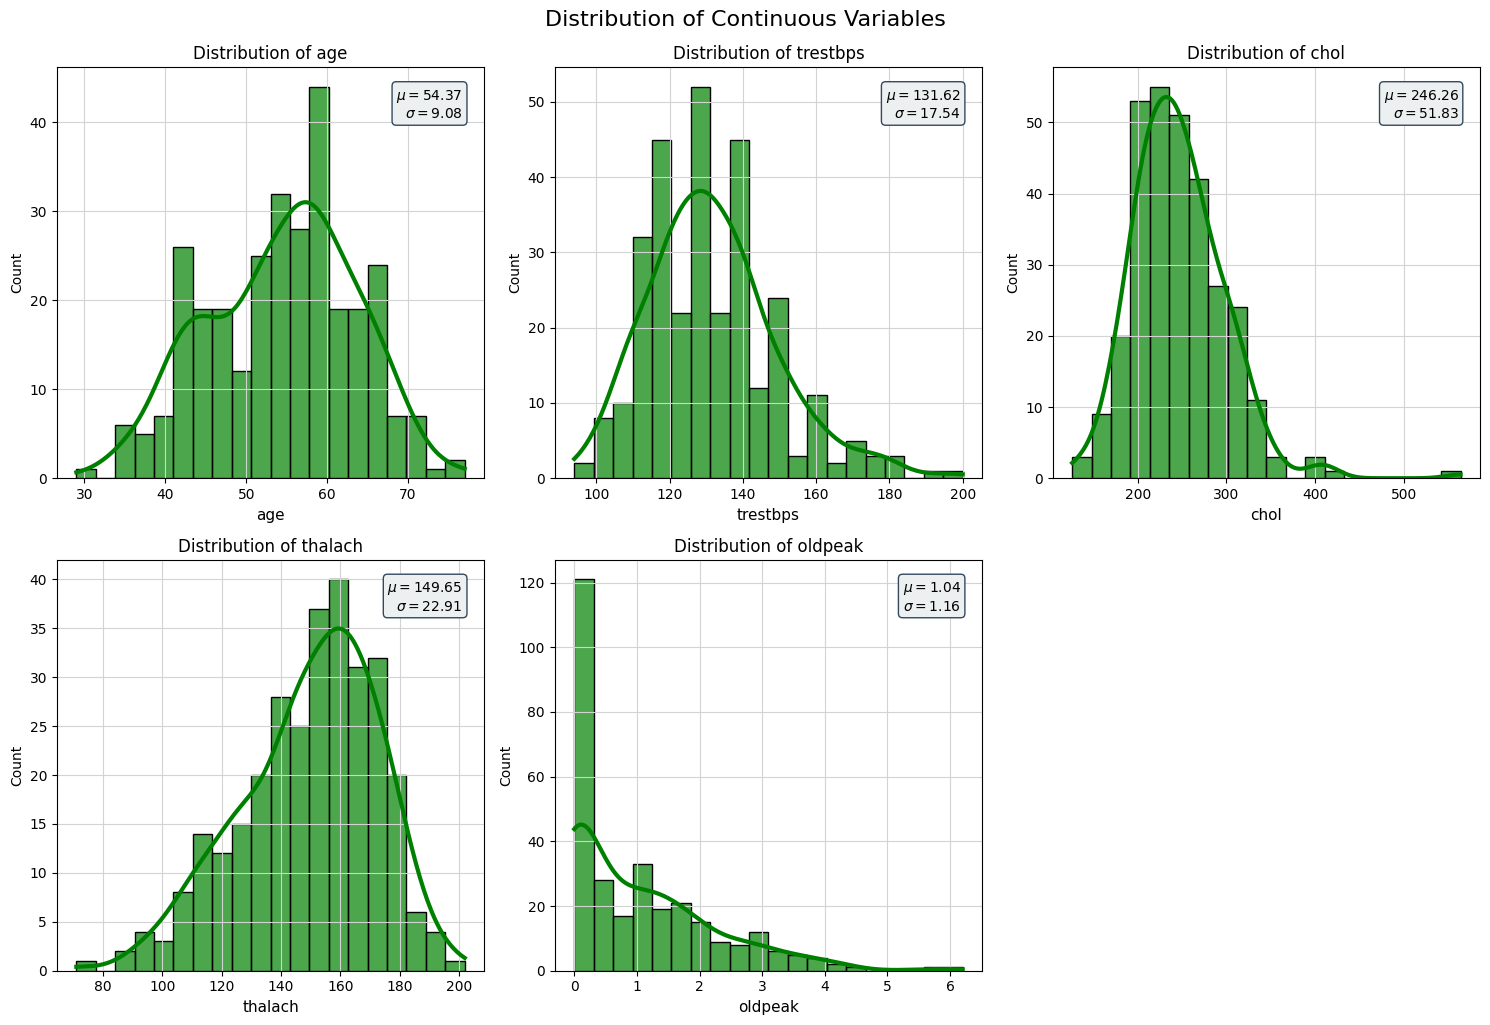

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df[continuous_features].columns):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], color='green', alpha=0.7, line_kws={'lw': 3})
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col,fontsize=11)
    axes[i].set_ylabel('Count')
    axes[i].grid(color='lightgrey')
    
    # Add mean and std annotation
    mean, std = df[col].mean(), df[col].std()
    textstr = f'$\mu={mean:.2f}$\n$\sigma={std:.2f}$'
    axes[i].text(0.95, 0.95, textstr, transform=axes[i].transAxes, fontsize=10,
                  verticalalignment='top', horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor='#ECF0F1', edgecolor='#34495E', pad=0.3))

# Hide any unused axes
for j in range(len(df[continuous_features].columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Continuous Variables', fontsize=16, y=1.02)
plt.show()

<span style="font-size: 30px; font-weight: bold; color: green;">Categorical Variables Univariate Analysis</span>

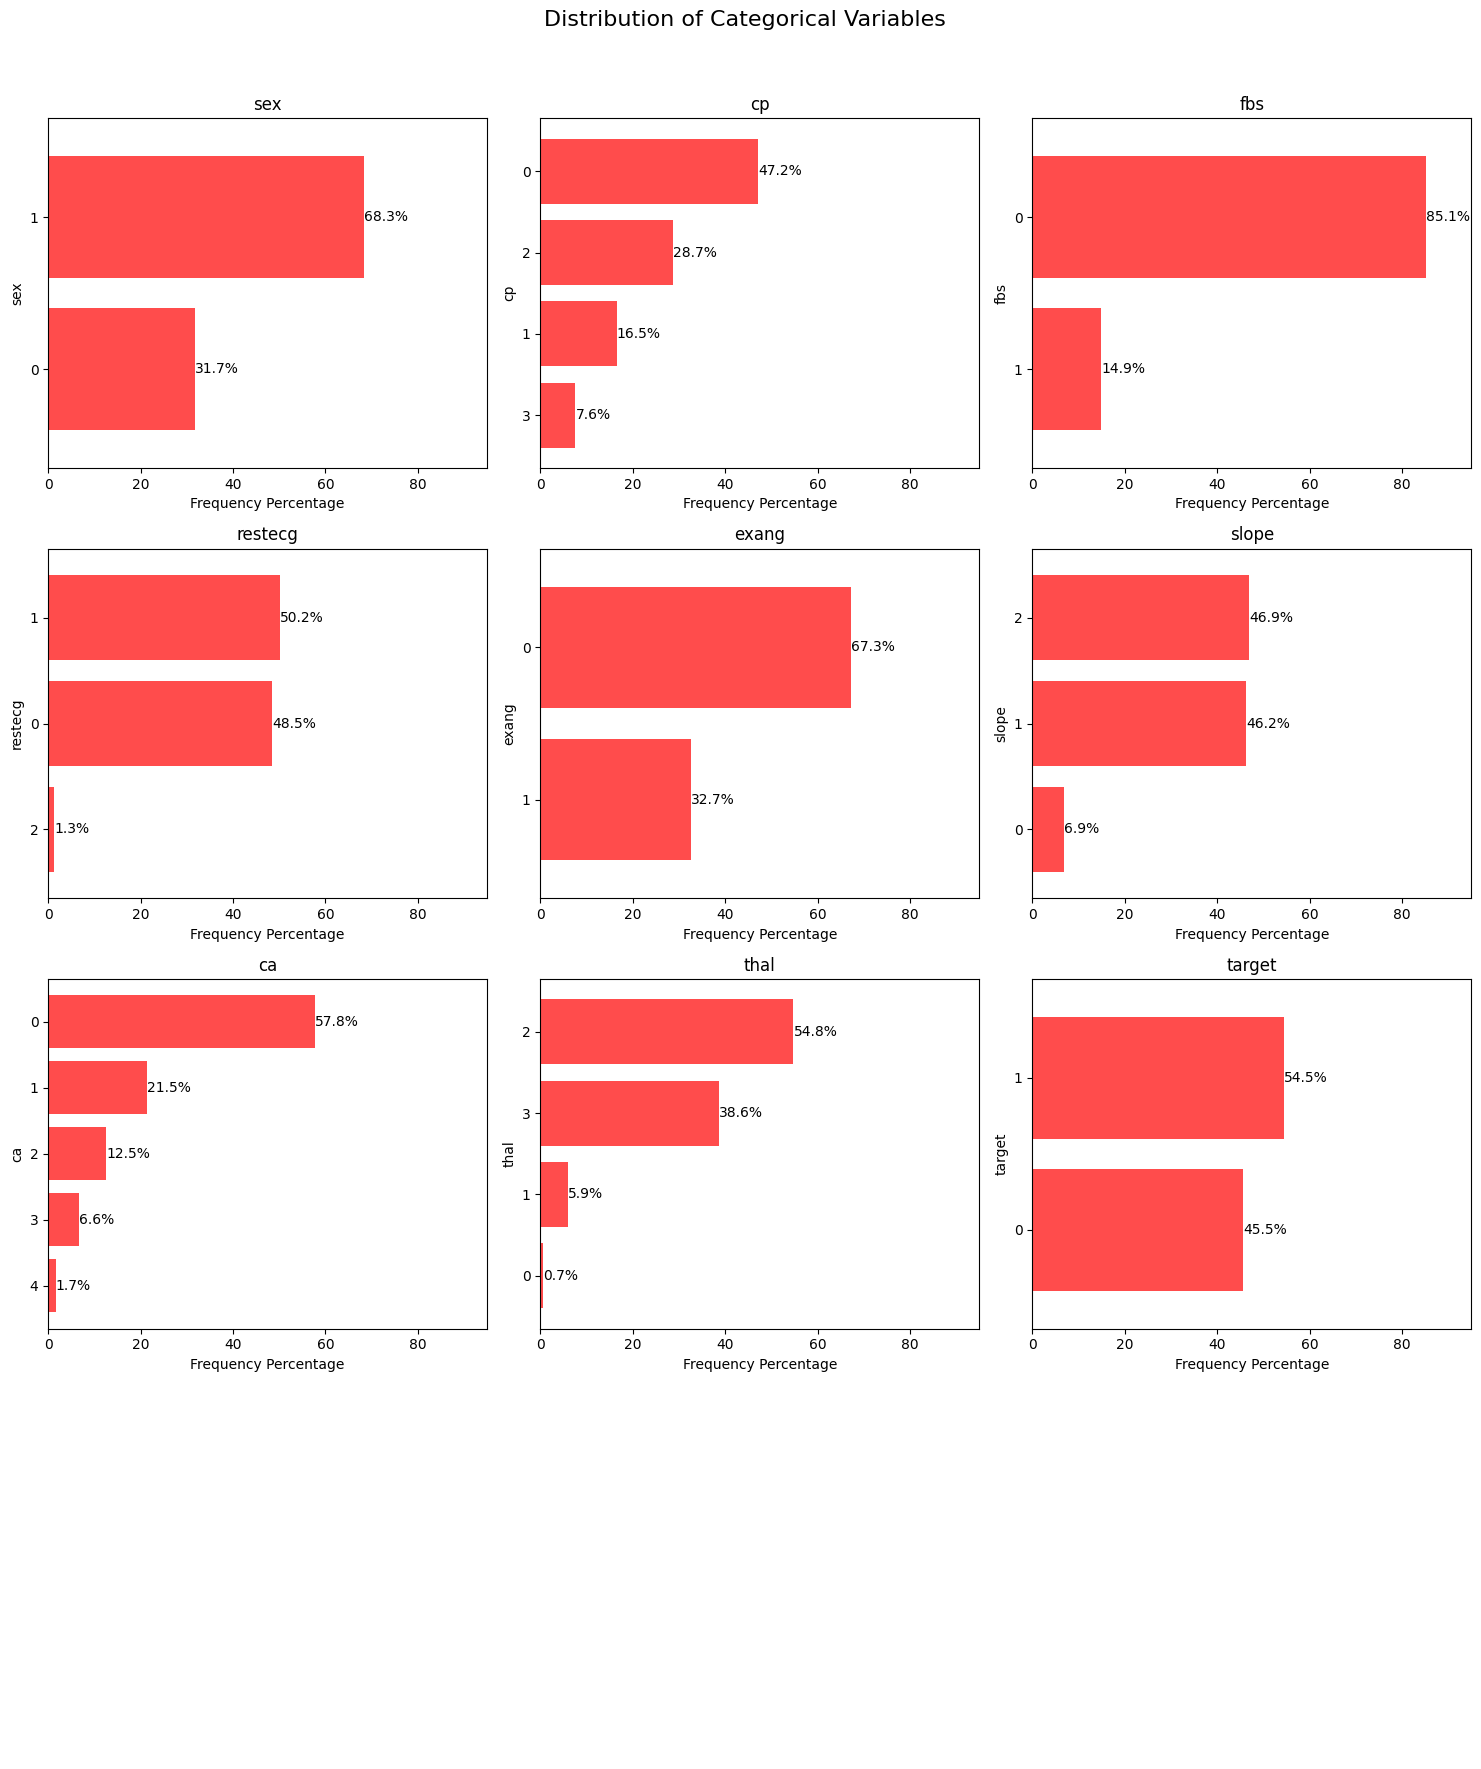

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    value_counts.plot(kind='barh', ax=axes[i], width=0.8, color='red', alpha=0.7)
    
    for index, value in enumerate(value_counts):
        axes[i].text(value, index, f'{value:.1f}%', fontsize=10, va='center')

    axes[i].set_xlim(0, 95)
    axes[i].set_xlabel('Frequency Percentage', fontsize=10)
    axes[i].set_title(col, fontsize=12)

# Turn off unused axes
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<span style="font-size: 30px; font-weight: bold; color: green;">Numerical Features vs Target</span>

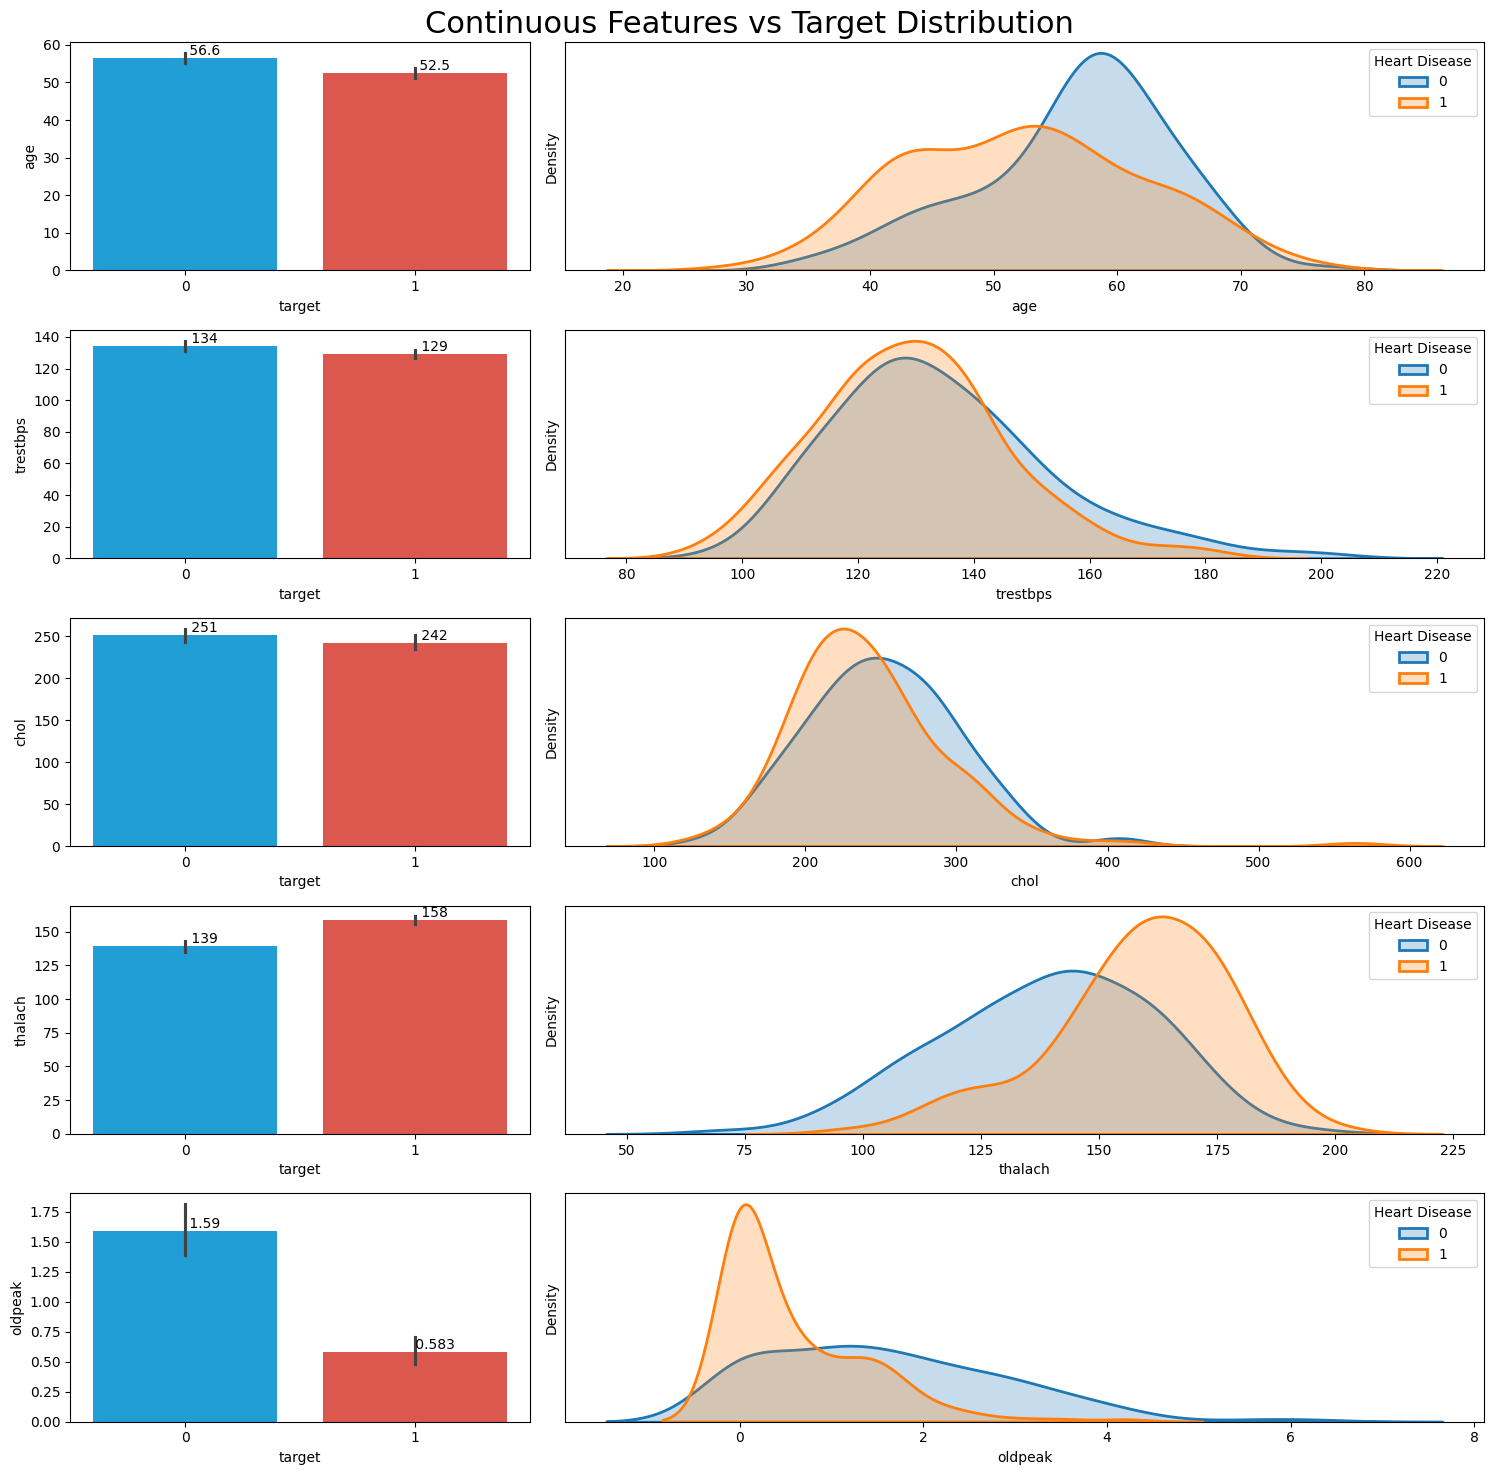

In [20]:
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    # Barplot for mean values
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i, 0], palette=['#03a9f4','#f44336'])
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
    
    # KDE plot for feature distribution
    sns.kdeplot(data=df[df["target"] == 0], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='0')
    sns.kdeplot(data=df[df["target"] == 1], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='1')
    ax[i, 1].set_yticks([])  # Hide y-axis ticks
    ax[i, 1].legend(title='Heart Disease', loc='upper right')

plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()


<span style="font-size: 30px; font-weight: bold; color: green;">Categorical Features vs Target</span>

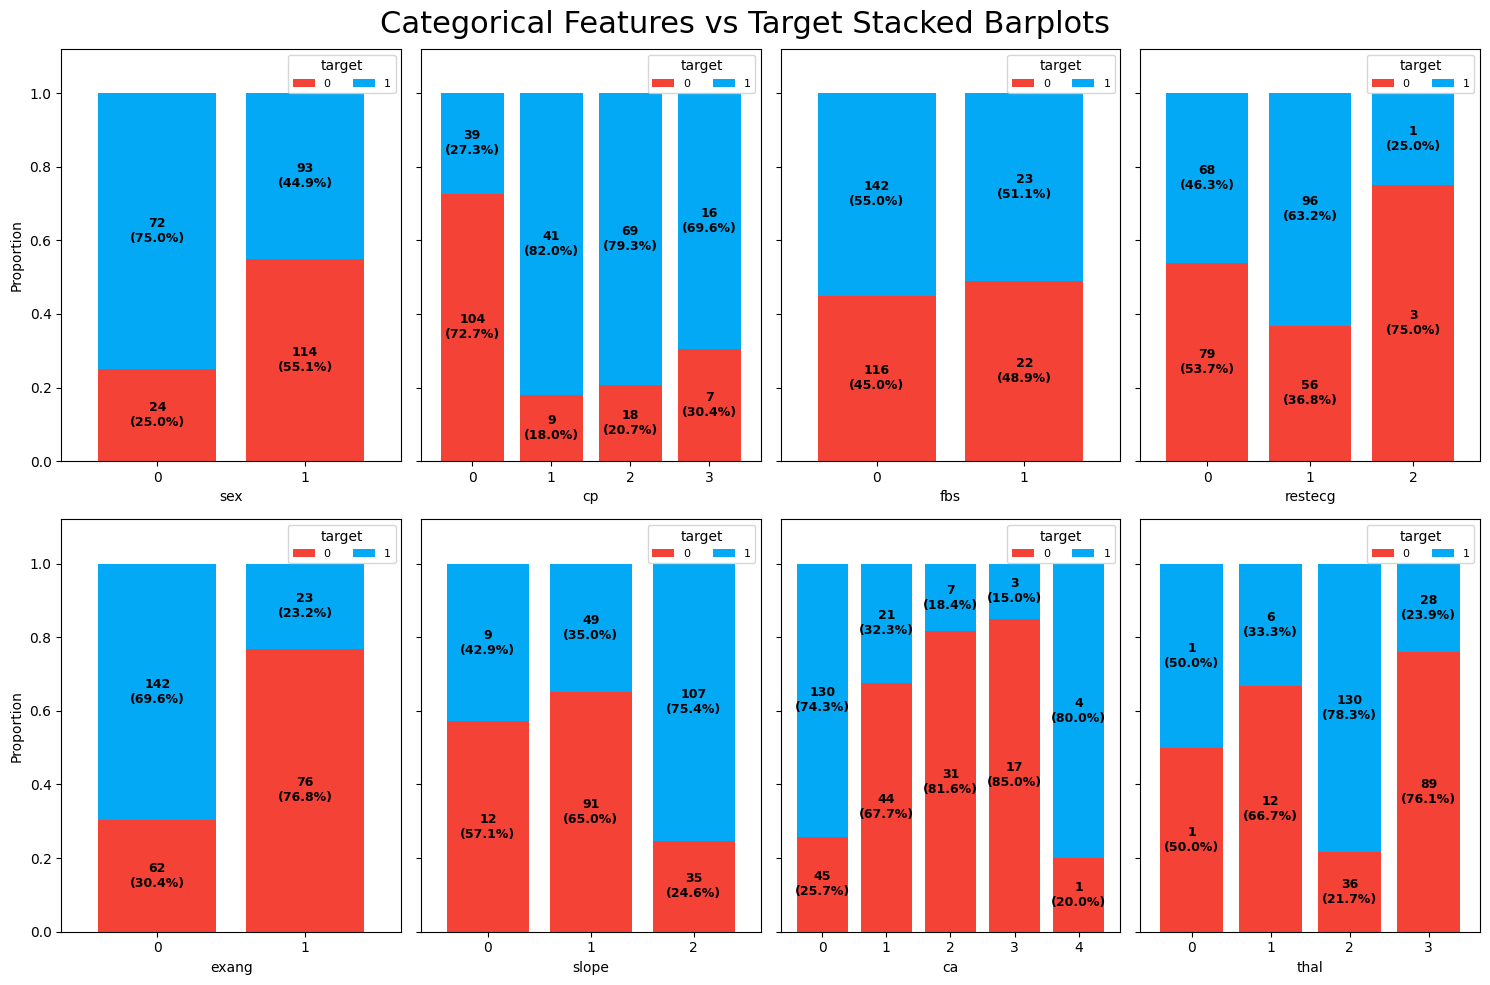

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate([f for f in categorical_features if f != 'target']):
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])  # Cross-tabulation
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')  # Proportions

    # Plot the bar chart
    cross_tab_prop.plot(
        kind='bar', ax=axes[i], stacked=True, width=0.8,
        color=['#f44336', '#03a9f4'], legend=False, ylabel='Proportion', sharey=True
    )

    # Add values and proportions
    for idx, val in enumerate(cross_tab.index):
        for proportion, count, y_pos in zip(
            cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()
        ):
            axes[i].text(
                x=idx, y=y_pos - proportion / 2,
                s=f'{count}\n({proportion * 100:.1f}%)',
                ha='center', va='center', fontsize=9, fontweight='bold'
            )

    # Configure axes
    axes[i].legend(title='target', loc='upper right', fontsize=8, ncol=2)
    axes[i].set_ylim(0, 1.12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


<span style="font-size: 30px; font-weight: bold; color: green;">Outlier Treatment</span>

In [22]:
outlier_info = {}

for col in continuous_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR * 1.5
    upper_limit = Q3 + IQR * 1.5
    
    outliers_before = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    
    # Perform the clip operation only if there are outliers
    if outliers_before > 0:
        df[col] = np.where(df[col] >= upper_limit, upper_limit, 
                           np.where(df[col] <= lower_limit, lower_limit, df[col]))
    
    outliers_after = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    
    outlier_info[col] = {
        "Outliers Before": outliers_before,
        "Outliers After": outliers_after
    }

for col, info in outlier_info.items():
    print(f"Column: {col}")
    print(f" - Outliers Before: {info['Outliers Before']}")
    print(f" - Outliers After: {info['Outliers After']}")
    print("-" * 30)


Column: age
 - Outliers Before: 0
 - Outliers After: 0
------------------------------
Column: trestbps
 - Outliers Before: 9
 - Outliers After: 0
------------------------------
Column: chol
 - Outliers Before: 5
 - Outliers After: 0
------------------------------
Column: thalach
 - Outliers Before: 1
 - Outliers After: 0
------------------------------
Column: oldpeak
 - Outliers Before: 5
 - Outliers After: 0
------------------------------


<span style="font-size: 30px; font-weight: bold; color: green;">Categorical Features Encoding</span>

<div style="background-color: rgb(119, 211, 165); padding: 15px; border-left: 5px solid #4682b4; border-radius: 5px;">

### One-Hot Encoding Decision

#### Nominal Variables (One-Hot Encode):
- **`cp`**: Chest pain types lack an inherent order.
- **`restecg`**: Resting ECG results are categorical without ordinal relationships.
- **`thal`**: Thalium stress test outcomes are nominal.

#### Ordinal/Binary Variables (No One-Hot Encoding):
- **`sex`**, **`fbs`**, **`exang`**: Binary variables, encoding unnecessary.
- **`slope`**, **`ca`**: Represent counts or have a natural order.

### Summary:
- **One-Hot Encode:** `cp`, `restecg`, `thal`
- **Do Not Encode:** `sex`, `fbs`, `exang`, `slope`, `ca`


In [23]:
#Encoding and Data Type Conversion
df_encoded=pd.get_dummies(df, columns=["cp", "restecg","thal"], drop_first=True)
convert_features=["sex","fbs","exang","slope","ca","target"]
for feature in convert_features:
    df_encoded[feature]=df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int64
trestbps     float64
chol         float64
fbs            int64
thalach      float64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [24]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145.0,233.0,1,150.0,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130.0,250.0,0,187.0,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130.0,204.0,0,172.0,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120.0,236.0,0,178.0,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120.0,354.0,0,163.0,1,0.6,2,0,1,False,False,False,True,False,False,True,False


<span style="font-size: 30px; font-weight: bold; color: green;">Separating Features (X) and Target Variable (y)</span>

In [25]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [34]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style="font-size: 30px; font-weight: bold; color: green;">GridSearchCV Hyperparameter Tuning</span>

In [27]:
def tune_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_, grid_search.best_params_

<span style="font-size: 30px; font-weight: bold; color: green;">Decision Tree Hyperparameter Tuning</span>

In [35]:
dt_base = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [2, 3]
}

# Tune hyperparameters
best_dt, best_dt_hyperparams = tune_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

# Print optimal hyperparameters
print("\n=== Decision Tree Optimal Hyperparameters ===")
for param, value in best_dt_hyperparams.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, best_dt.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_dt.predict(X_test)))



=== Decision Tree Optimal Hyperparameters ===
criterion: gini
max_depth: 4
min_samples_leaf: 3
min_samples_split: 3

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       109
           1       0.89      0.87      0.88       133

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



<span style="font-size: 30px; font-weight: bold; color: green;">Random Forest Hyperparameter Tuning</span>

In [36]:
rf_base = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [2, 3],
    'bootstrap': [True]
}

# Tune hyperparameters
best_rf, best_rf_hyperparams = tune_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

# Print optimal hyperparameters
print("\n=== Random Forest Optimal Hyperparameters ===")
for param, value in best_rf_hyperparams.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, best_rf.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_rf.predict(X_test)))



=== Random Forest Optimal Hyperparameters ===
bootstrap: True
criterion: gini
max_depth: 3
min_samples_leaf: 2
min_samples_split: 4
n_estimators: 50

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.86      0.88      0.87       133

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<span style="font-size: 30px; font-weight: bold; color: green;">Logistic Regression Hyperparameter Tuning</span>

In [37]:
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

logreg_param_grid = {
    'logreg__penalty': ['l2', 'elasticnet'],
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['lbfgs', 'saga'],
    'logreg__l1_ratio': [0.1, 0.5, 0.9]
}

# Tune hyperparameters
best_logreg, best_logreg_hyperparams = tune_hyperparameters(logreg_pipeline, logreg_param_grid, X_train, y_train)

# Print optimal hyperparameters
print("\n=== Logistic Regression Optimal Hyperparameters ===")
for param, value in best_logreg_hyperparams.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, best_logreg.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_logreg.predict(X_test)))



=== Logistic Regression Optimal Hyperparameters ===
logreg__C: 0.1
logreg__l1_ratio: 0.9
logreg__penalty: elasticnet
logreg__solver: saga

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       109
           1       0.83      0.89      0.86       133

    accuracy                           0.84       242
   macro avg       0.84      0.83      0.84       242
weighted avg       0.84      0.84      0.84       242



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<span style="font-size: 30px; font-weight: bold; color: green;">KNN Hyperparameter Tuning</span>

In [40]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': [5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],  # distance gives more weight to closer neighbors
    'knn__p': [1, 2],  # 1: Manhattan distance, 2: Euclidean distance
}

# Tune hyperparameters
best_knn, best_knn_hyperparams = tune_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)

# Print optimal hyperparameters
print("\n=== KNN Optimal Hyperparameters ===")
for param, value in best_knn_hyperparams.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, best_knn.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_knn.predict(X_test)))



=== KNN Optimal Hyperparameters ===
knn__n_neighbors: 5
knn__p: 2
knn__weights: uniform

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       109
           1       0.87      0.87      0.87       133

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<span style="font-size: 30px; font-weight: bold; color: green;">SVM Hyperparameter Tuning</span>

In [43]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

svm_param_grid = {
    'svm__C': [0.01, 0.1, 1],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3],
    'svm__class_weight': ['balanced']
}


# Tune hyperparameters
best_svm, best_svm_hyperparams = tune_hyperparameters(svm_pipeline, svm_param_grid, X_train, y_train)

# Print optimal hyperparameters
print("\n=== SVM Optimal Hyperparameters ===")
for param, value in best_svm_hyperparams.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, best_svm.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_svm.predict(X_test)))



=== SVM Optimal Hyperparameters ===
svm__C: 0.01
svm__class_weight: balanced
svm__degree: 2
svm__gamma: scale
svm__kernel: linear

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.86      0.86      0.86       133

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

